In [1]:
import pandas as pd

# CSV file load 
df = pd.read_csv("Coca-Cola_stock_history (1).csv")

# First 5 rows 
print(df.head())


         Date      Open      High       Low     Close   Volume  Dividends  \
0  1962-01-02  0.050016  0.051378  0.050016  0.050016   806400        0.0   
1  1962-01-03  0.049273  0.049273  0.048159  0.048902  1574400        0.0   
2  1962-01-04  0.049026  0.049645  0.049026  0.049273   844800        0.0   
3  1962-01-05  0.049273  0.049892  0.048035  0.048159  1420800        0.0   
4  1962-01-08  0.047787  0.047787  0.046735  0.047664  2035200        0.0   

   Stock Splits  
0             0  
1             0  
2             0  
3             0  
4             0  


In [3]:
# Step 1: timezone handle
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', utc=True)

# Step 2: Missing values 
print("Missing values:\n", df.isnull().sum())

# Step 3: Duplicate rows check
print("\nDuplicate rows:", df.duplicated().sum())

# Step 4: Data types check
print("\nData types:")
print(df.dtypes)

# Step 5: Date ko index set 
df.set_index('Date', inplace=True)

# Step 6: Pehle 5 rows 
print("\nPreview after cleaning:")
print(df.head())


Missing values:
 Date            8840
Open               0
High               0
Low                0
Close              0
Volume             0
Dividends          0
Stock Splits       0
dtype: int64

Duplicate rows: 0

Data types:
Date            datetime64[ns, UTC]
Open                        float64
High                        float64
Low                         float64
Close                       float64
Volume                        int64
Dividends                   float64
Stock Splits                  int64
dtype: object

Preview after cleaning:
                               Open      High       Low     Close   Volume  \
Date                                                                         
1962-01-02 00:00:00+00:00  0.050016  0.051378  0.050016  0.050016   806400   
1962-01-03 00:00:00+00:00  0.049273  0.049273  0.048159  0.048902  1574400   
1962-01-04 00:00:00+00:00  0.049026  0.049645  0.049026  0.049273   844800   
1962-01-05 00:00:00+00:00  0.049273  0.049892  0.0480

In [4]:
# Step 1: 20-day & 50-day Moving Averages
df['MA_20'] = df['Close'].rolling(window=20).mean()
df['MA_50'] = df['Close'].rolling(window=50).mean()

# Step 2: Daily Returns (percentage change in Close price)
df['Daily_Return'] = df['Close'].pct_change()

# Step 3: Volatility (20-day rolling std deviation of returns)
df['Volatility'] = df['Daily_Return'].rolling(window=20).std()

# Step 4: Drop NA rows 
df.dropna(inplace=True)

# Step 5: Preview updated dataset
print(df.head())


                               Open      High       Low     Close   Volume  \
Date                                                                         
1962-03-13 00:00:00+00:00  0.046416  0.046789  0.046416  0.046789  1344000   
1962-03-14 00:00:00+00:00  0.046789  0.046976  0.046603  0.046852  1689600   
1962-03-15 00:00:00+00:00  0.046852  0.046976  0.046603  0.046603   883200   
1962-03-16 00:00:00+00:00  0.046603  0.046789  0.046603  0.046603   768000   
1962-03-19 00:00:00+00:00  0.046603  0.047101  0.046603  0.046852   921600   

                           Dividends  Stock Splits     MA_20     MA_50  \
Date                                                                     
1962-03-13 00:00:00+00:00   0.001563             0  0.045788  0.046525   
1962-03-14 00:00:00+00:00   0.000000             0  0.045797  0.046461   
1962-03-15 00:00:00+00:00   0.000000             0  0.045836  0.046415   
1962-03-16 00:00:00+00:00   0.000000             0  0.045889  0.046362   
1962-03-1

In [6]:
# Timezone remove(convert to naive datetime)
df.index = df.index.tz_convert(None)


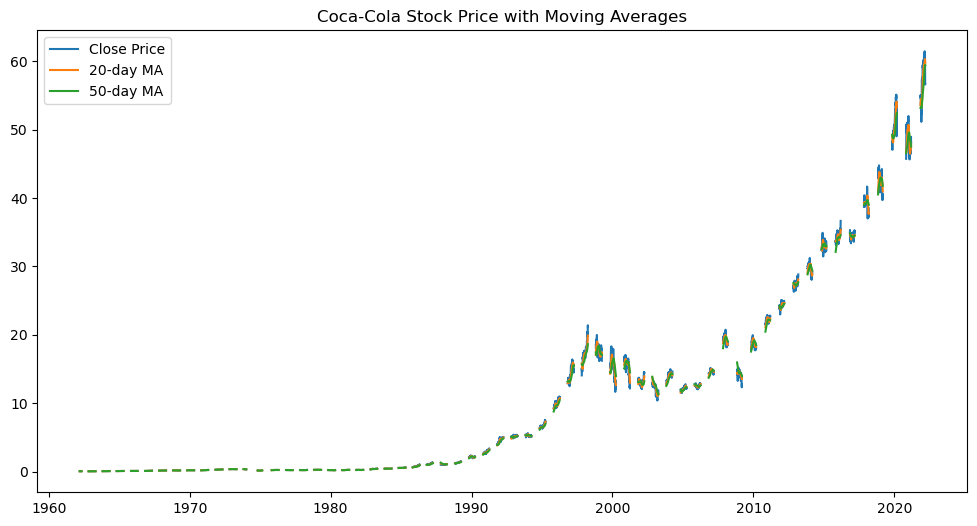

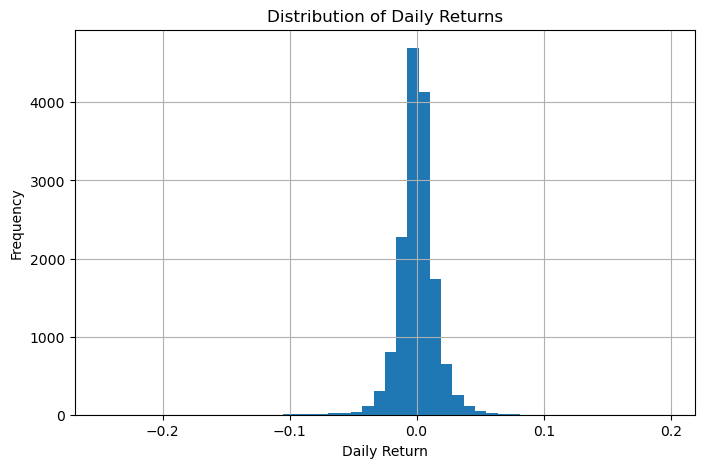

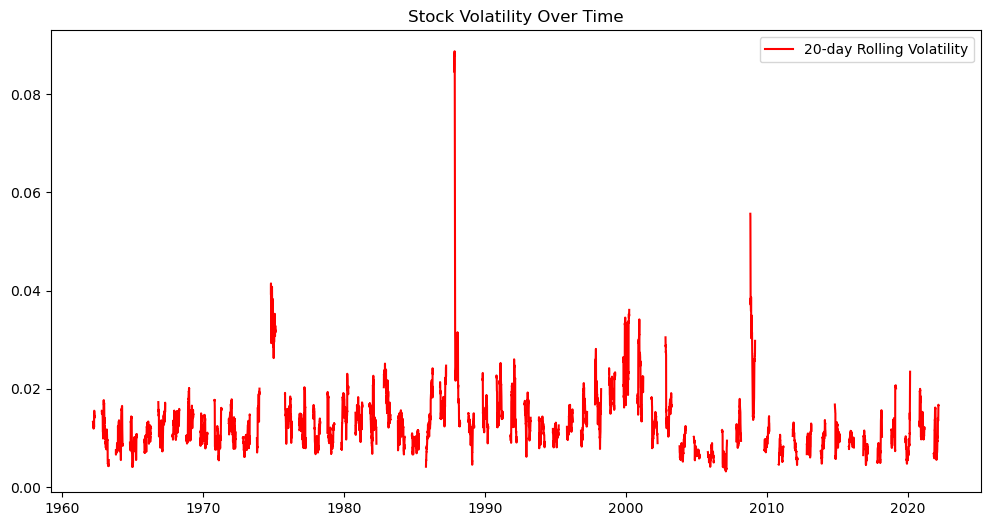

In [7]:
import matplotlib.pyplot as plt

# Step 1: Close Price ke sath Moving Averages
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Close Price')
plt.plot(df['MA_20'], label='20-day MA')
plt.plot(df['MA_50'], label='50-day MA')
plt.legend()
plt.title("Coca-Cola Stock Price with Moving Averages")
plt.show()

# Step 2: Histogram of Daily Returns
plt.figure(figsize=(8,5))
df['Daily_Return'].hist(bins=50)
plt.title("Distribution of Daily Returns")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.show()

# Step 3: Volatility Over Time
plt.figure(figsize=(12,6))
plt.plot(df['Volatility'], label='20-day Rolling Volatility', color='red')
plt.legend()
plt.title("Stock Volatility Over Time")
plt.show()


In [17]:
# Add lag features
df['Close_lag1'] = df['Close'].shift(1)
df['Close_lag2'] = df['Close'].shift(2)

# Drop missing values after shift
df.dropna(inplace=True)


In [18]:
# Features with lag
X = df[['Open', 'High', 'Low', 'Volume', 'MA_20', 'MA_50', 'Daily_Return', 'Volatility', 'Close_lag1', 'Close_lag2']]
y = df['Close']

# Scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)


In [19]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


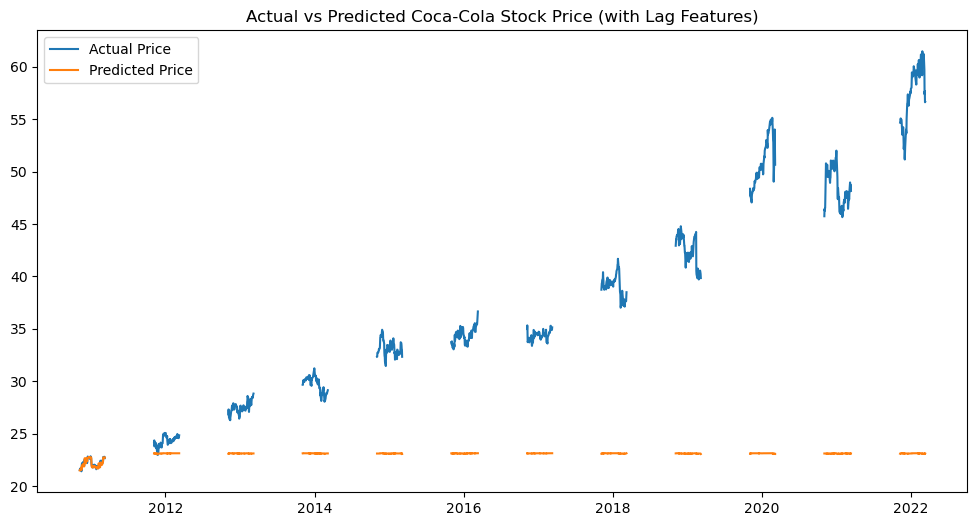

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test, label="Actual Price")
plt.plot(y_test.index, y_pred, label="Predicted Price")
plt.legend()
plt.title("Actual vs Predicted Coca-Cola Stock Price (with Lag Features)")
plt.show()


In [22]:
pip install prophet


   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   - -------------------------------------- 0.5/13.3 MB 4.1 MB/s eta 0:00:04
   ------- -------------------------------- 2.6/13.3 MB 8.6 MB/s eta 0:00:02
   -------------- ------------------------- 5.0/13.3 MB 9.7 MB/s eta 0:00:01
   ---------------------- ----------------- 7.3/13.3 MB 10.2 MB/s eta 0:00:01
   ----------------------------- ---------- 10.0/13.3 MB 10.6 MB/s eta 0:00:01
   ------------------------------------ --- 12.3/13.3 MB 10.8 MB/s eta 0:00:01
   ---------------------------------------- 13.3/13.3 MB 10.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 1.2/1.2 MB 10.7 MB/s eta 0:00:00

   -------- ------------------------------- 1/5 [importlib_resources]
   -------- ------------------------------- 1/5 [importlib_resources]
   -------- ------------------------------- 1/5 [importlib_resources]
   ---------------- -------

In [25]:
from prophet import Prophet

# Prophet ke format me data banana
prophet_df = df.reset_index()[['Date','Close']]
prophet_df.columns = ['ds', 'y']   # rename columns

# Timezone hatao aur NaN rows drop karo
prophet_df['ds'] = prophet_df['ds'].dt.tz_localize(None)   # remove timezone
prophet_df = prophet_df.dropna()                           # remove NaN rows

print(prophet_df.head())
print(prophet_df.tail())


          ds         y
0 1962-03-15  0.046603
1 1962-03-16  0.046603
2 1962-03-19  0.046852
3 1962-03-20  0.047350
4 1962-03-21  0.047973
              ds          y
15097 2022-03-07  59.745594
15098 2022-03-08  57.378468
15099 2022-03-09  57.671913
15100 2022-03-10  56.615509
15101 2022-03-11  56.654629


In [26]:
# Model initialize
model = Prophet(daily_seasonality=True)

# Train
model.fit(prophet_df)


12:16:10 - cmdstanpy - INFO - Chain [1] start processing
12:16:18 - cmdstanpy - INFO - Chain [1] done processing


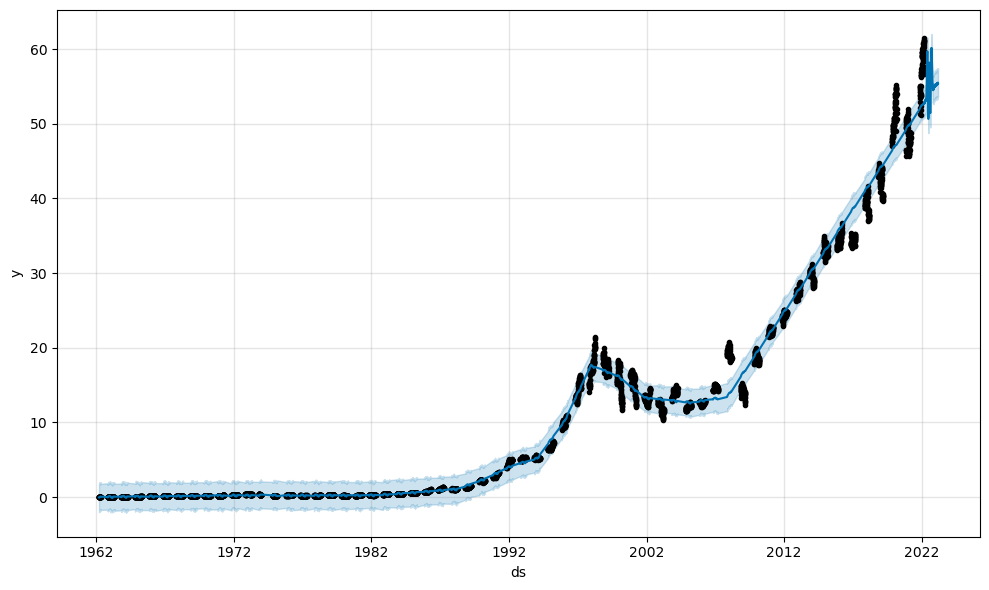

In [27]:
# Next 1 year ke dates
future = model.make_future_dataframe(periods=365)

# Forecast
forecast = model.predict(future)

# Plot forecast
fig = model.plot(forecast)


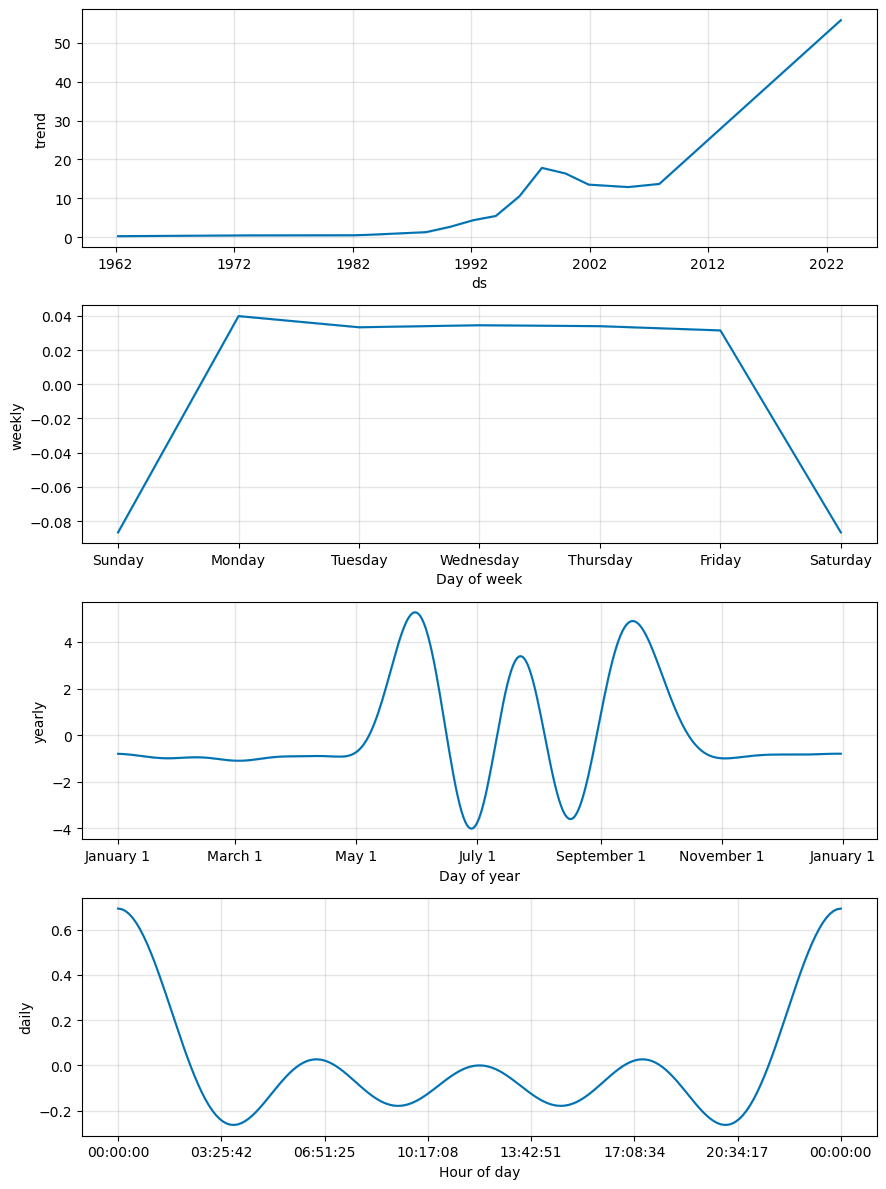

In [28]:
fig2 = model.plot_components(forecast)


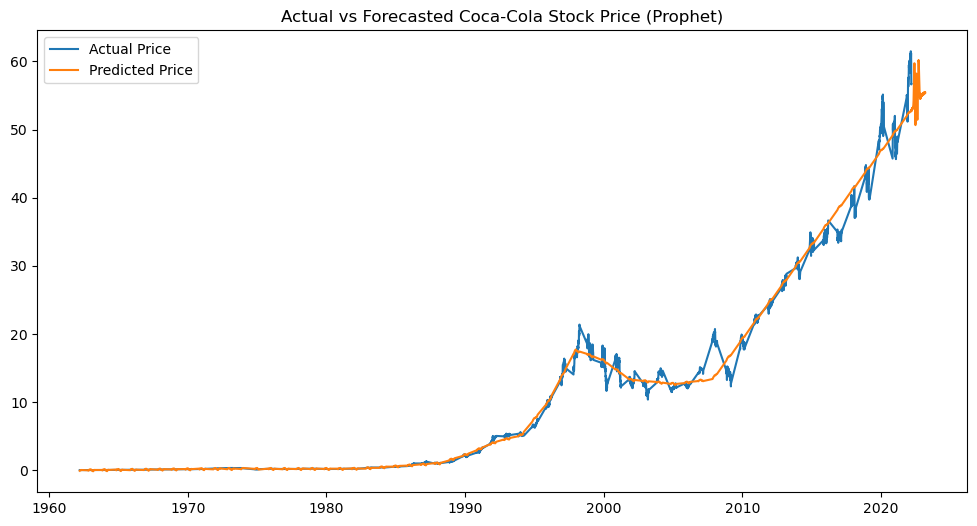

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(prophet_df['ds'], prophet_df['y'], label="Actual Price")
plt.plot(forecast['ds'], forecast['yhat'], label="Predicted Price")
plt.legend()
plt.title("Actual vs Forecasted Coca-Cola Stock Price (Prophet)")
plt.show()
